In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, r2_score

In [ ]:
# Load Dataset
data = pd.read_csv('/content/insurance.csv')
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


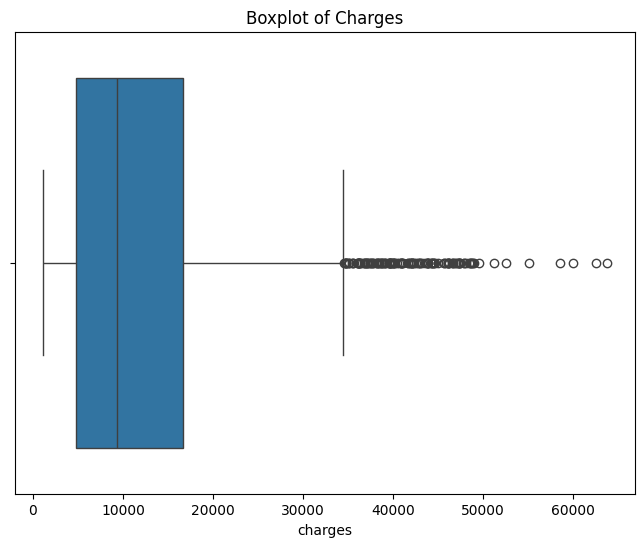

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['charges'])
plt.title("Boxplot of Charges")
plt.show()


In [ ]:
# Data Preprocessing
scaler = StandardScaler()
data[['age', 'bmi']] = scaler.fit_transform(data[['age', 'bmi']])

In [ ]:
# Outlier Removal: Remove top 1% of 'charges'
data = data[data['charges'] < data['charges'].quantile(0.99)].reset_index(drop=True)

In [ ]:
# Handling Categorical Variables with Label Encoding
label_encoders = {}

In [ ]:
# Handling Categorical Variables with Label Encoding
label_encoders = {}

for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Train-Test Split (80% training, 20% testing)
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Modeling: Linear Regression
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
print(f"Linear Regression Coefficients: {lm_model.coef_}")

# Modeling: Random Forest Classifier (Predict 'smoker')
rf_model = RandomForestClassifier(n_estimators=500, random_state=123)
rf_model.fit(X_train.drop('smoker', axis=1), X_train['smoker'])

print(f"Random Forest Model: {rf_model}")

Linear Regression Coefficients: [ 3457.38227341  -107.43982966  1867.88902208   554.11062693
 22993.95691722  -414.7979086 ]
Random Forest Model: RandomForestClassifier(n_estimators=500, random_state=123)


In [ ]:
# Model Evaluation: Linear Regression
y_pred = lm_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression R²: {r2}")


Linear Regression RMSE: 5598.742714321515
Linear Regression R²: 0.7440772682071528


In [ ]:
# Model Evaluation: Random Forest Classifier
rf_pred = rf_model.predict(X_test.drop('smoker', axis=1))
cm = confusion_matrix(X_test['smoker'], rf_pred)
accuracy = accuracy_score(X_test['smoker'], rf_pred)

print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy for Random Forest: {accuracy}")

Confusion Matrix:
[[206   9]
 [ 47   3]]
Accuracy for Random Forest: 0.7886792452830189


In [ ]:
# Deployment: Predict Charges for New Input Data
new_data = pd.DataFrame({
    'age': [30],
    'sex': [label_encoders['sex'].transform(['male'])[0]],
    'bmi': [25],
    'children': [2],
    'smoker': [label_encoders['smoker'].transform(['no'])[0]],
    'region': [label_encoders['region'].transform(['southwest'])[0]]
})

In [ ]:
# Deployment: Predict Charges for New Input Data
new_data = pd.DataFrame({
    'age': [60],
    'sex': [label_encoders['sex'].transform(['female'])[0]],
    'bmi': [25.84],
    'children': [0],
    'smoker': [label_encoders['smoker'].transform(['no'])[0]],
    'region': [label_encoders['region'].transform(['northwest'])[0]]
})

In [ ]:
# Scale the new input data
new_data[['age', 'bmi']] = scaler.transform(new_data[['age', 'bmi']])

# Predict charges for the new input
predicted_charges = lm_model.predict(new_data)
print(f"Predicted Charges: {predicted_charges[0]}")

Predicted Charges: 11781.903704562024
